# Chapter 3: Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
pwd = os.getcwd()
filepath = os.path.join(pwd, "wine.csv")

In [3]:
df_wine = pd.read_csv(filepath)
df_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


<AxesSubplot:>

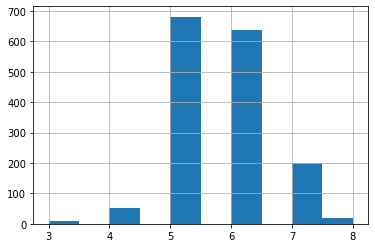

In [4]:
df_wine["quality"].hist()

In [5]:
X = df_wine.iloc[:,:-1]       # pick all the rows except "quality"
y = df_wine["quality"] > 5    # make the quality binary

## Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7)
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
363,12.5,0.460,0.63,2.00,0.071,6.0,15.0,0.99880,2.99,0.87,10.2
1385,8.0,0.810,0.25,3.40,0.076,34.0,85.0,0.99668,3.19,0.42,9.2
370,6.9,0.765,0.02,2.30,0.063,35.0,63.0,0.99750,3.57,0.78,9.9
151,9.2,0.520,1.00,3.40,0.610,32.0,69.0,0.99960,2.74,2.00,9.4
458,10.4,0.330,0.63,2.80,0.084,5.0,22.0,0.99980,3.26,0.74,11.2
...,...,...,...,...,...,...,...,...,...,...,...
211,8.0,0.725,0.24,2.80,0.083,10.0,62.0,0.99685,3.35,0.56,10.0
502,10.4,0.440,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0
537,8.1,0.825,0.24,2.10,0.084,5.0,13.0,0.99720,3.37,0.77,10.7
1220,10.9,0.320,0.52,1.80,0.132,17.0,44.0,0.99734,3.28,0.77,11.5


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [8]:
#Combine everything into a function

def preprocessing(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7)

    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.fit_transform(X_test)

    return scaled_X_train, scaled_X_test, y_train, y_test

## Classification Algorithm

### C-Spuuort Vector Classifier

In [9]:
from sklearn.svm import SVC          # C-Spuuort Vector Classifier

svc_clf = SVC()

svc_clf.fit(scaled_X_train, y_train)

SVC()

In [10]:
svc_clf_predictions = svc_clf.predict(scaled_X_test)  # predictions using the test data

In [11]:
# The error metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def accuracy_metrics(y_test, predictions):
    confusion = confusion_matrix(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1Score = f1_score(y_test, predictions)

    return confusion, accuracy, precision, recall, f1Score

In [12]:
accuracy_metrics(y_test, svc_clf_predictions)

(array([[106,  27],
        [ 44, 143]], dtype=int64),
 0.778125,
 0.8411764705882353,
 0.7647058823529411,
 0.8011204481792716)

### Finding Best Estimator Using RandomForestClassifier

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # try 12 (3*4) combinations of hyperparameters
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    # then try 6 (2*3) combination with bootstrap set as False
    {'bootstrap':[False], 'n_estimators': [3,10], 'max_features': [2,4,6]}
]

rfc = RandomForestClassifier(random_state=42)
#train across 5 folds, thats a total of (12+6)*5=90 rounds of training

grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring="accuracy", return_train_score=True)
grid_search.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 4, 6],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

In [16]:
rfc_best = grid_search.best_estimator_          #best estimator among the grid search

In [17]:
rfc_best_predictions = rfc_best.predict(scaled_X_test)    #predictions using the best estimator

In [18]:
accuracy_metrics(y_test, rfc_best_predictions)

(array([[115,  18],
        [ 44, 143]], dtype=int64),
 0.80625,
 0.8881987577639752,
 0.7647058823529411,
 0.8218390804597702)